# Global Land Temperature (1743 -2013)

This data analysis is based on a dataset from kaggle:

https://www.kaggle.com/datasets/maso0dahmed/global-temperature-records-1850-2022/data

Data Description:

* df - Data of the record
* AverageTemperature - Average temperature of the city for the given date
* AverageTemperatureUncertainty - The uncertainty of the average temperature
* City - Name of the city
* Country - Country in which the city is located.
* Latitude - Latitude of the city
* Longitude - Longitude of the city



# Introduction

In this data analysis I would like to try and answer:

1. Which countries have seen the greatest temperature gains over the time period
2. Which city saw the highest temperature and when
3. Which city saw the lowest temperature and when
4. Have look at the different pattern of temperature in different regions.
5. Which was the hottest country.
6. Which was the coldest country.
7. When did the countries/continents record the first temperature.



In [445]:
# This is a Data Analysis of Global Temperatures recorded between 1743 and 2013 
# Using a Data set from Kaggle: Global Temperature Records (1743-2013)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Reading Data in DataFrame

In [447]:
# Load the Global Temperature Records data set

df = pd.read_csv('Data/GlobalTemp/GlobalLandTemperatures.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Exploratory Data Analysis

In [449]:
# Using the describe() method to obtain basic descriptive statistics for the DataFrame
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


This has provided information for all numerical columns in the DataFrame and I can see that there are some NaN values.
* The Average Temperature is 18.125
* The Minimum temperature is -26.772
* The Maximum Temperature is 38.283
* The Average Temperature Uncertainty is - 0.969
* The Minimum Temperature Uncertainty is - 0.0400
* The Maximum Temperature Uncertainty is - 14.03

In [451]:
# Look at the description of the data for object types:
df.describe(include = 'O')

,dt,City,Country,Latitude,Longitude
count,239177,239177,239177,239177,239177
unique,3239,100,49,49,93
top,1983-12-01,Rome,India,31.35N,31.38E
freq,100,3239,36582,13875,6801


I can see from this data that there are:
* 3239 unique dates
* 100 unique countries 
* 49 unique cities
* It looks like the 1983-12-01 date was the most recorded date in the data set

In [453]:
# I want to try and find out where these NaN values are 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


**I can see that there are:**
* 239177 rows of data
* 7 columns
* Most of the columns don't contain null values
* The only columns to contain null values are AverageTemperature and AverageTemperatureUncertainty.
* The majority of the columns are of object type.

## Data Cleaning and Preprocessing

1. Change the dt column to datetime
2. Change the dt column name to Date, the AverageTemperature to AvgTemperature and 
   the AverageTemperature to TemperatureUncertrainty to make the columns more readable.
4. Change the Longitude and Latitude column to a numeric column
5. Check for null values and remove them from the dataframe, if appropriate 
6. Check for duplicate values
7. Round the AverageTemperature (AvgTemperature) and AverageTemperatureUncertainty (TemperatureUncertainty) to 2 decimal places 
8. Reorder the data frame by Date


In [457]:
# Copy of the original DataFrame
df_temp = df.copy()

# Change the column names, to make them more readable

df_temp=df_temp.rename(columns = {'dt':'Date',
                                 'AverageTemperature': 'AvgTemperature',
                                 'AverageTemperatureUncertainty': 'TemperatureUncertainty'})

#Convert the column from an object to datetime

df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# convert the latitude and longitude to a numeric datatype
# Remove the N/W/E/S from the end of the longitude and Latitude values

df_temp['Latitude'] = df_temp['Latitude'].str.replace(r'[A-Z]+$', '', regex=True)
df_temp['Longitude'] = df_temp['Longitude'].str.replace(r'[A-Z]+$', '', regex=True)

# Convert the data type for Longitude and Latitude to a number

df_temp['Latitude'] = pd.to_numeric(df_temp['Latitude'], errors='coerce')
df_temp['Longitude'] = pd.to_numeric(df_temp['Longitude'], errors='coerce')

# Convert the AvgTemperature and TemperatureUncertainty to 2 decimal places.
df_temp['AvgTemperature'] = df_temp['AvgTemperature'].round(2)
df_temp['TemperatureUncertainty'] = df_temp['TemperatureUncertainty'].round(2)

# Add new columns year and months.
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Check for duplicate rows.
duplicate_rows = df_temp[df_temp.duplicated()]
duplicate_entries = df.duplicated().sum()

if not duplicate_rows.empty:
    print(f' There are {duplicate_entries} duplicate rows')
else:
    print('There are no duplicate rows found in this dataframe')


There are no duplicate rows found in this dataframe


In [458]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    239177 non-null  datetime64[ns]
 1   AvgTemperature          228175 non-null  float64       
 2   TemperatureUncertainty  228175 non-null  float64       
 3   City                    239177 non-null  object        
 4   Country                 239177 non-null  object        
 5   Latitude                239177 non-null  float64       
 6   Longitude               239177 non-null  float64       
 7   Year                    239177 non-null  int32         
 8   Month                   239177 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(2)
memory usage: 14.6+ MB


Sort the DataFrame so it is ordered by Date.

In [460]:

# Take a copy of the data frame, so I don't affect the original dataframe.
df_sorted = df_temp.copy()

# Sort the data on Date ascending order, (the earliest date first!)
df_sorted = df_sorted.sort_values(by=['Date'], inplace=False)


In [461]:
df_sorted.head()

,Date,AvgTemperature,TemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
173008,1743-11-01,7.65,1.75,Paris,France,49.03,2.45,1743,11
151957,1743-11-01,-1.85,1.73,Montreal,Canada,45.81,72.69,1743,11
24500,1743-11-01,6.33,1.60,Berlin,Germany,52.24,13.14,1743,11
138329,1743-11-01,6.65,2.02,Madrid,Spain,40.99,4.26,1743,11
128607,1743-11-01,7.54,1.75,London,United Kingdom,52.24,0.00,1743,11


In [462]:
df_sorted.tail()

,Date,AvgTemperature,TemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
72630,2013-09-01,NaN,NaN,Faisalabad,Pakistan,31.35,73.51,2013,9
70259,2013-09-01,NaN,NaN,Durban,South Africa,29.74,31.38,2013,9
68378,2013-09-01,NaN,NaN,Dhaka,Bangladesh,23.31,90.00,2013,9
93493,2013-09-01,NaN,NaN,Istanbul,Turkey,40.99,29.82,2013,9
239176,2013-09-01,NaN,NaN,Xian,China,34.56,108.97,2013,9


In [463]:
# Remove the rows where the AvgTemperature and TemperatureUncertainty
# have null values NaN values from the dataframe,

df_nullrows = df_sorted[df_sorted[['AvgTemperature', 'TemperatureUncertainty']].isna().any(axis=1)].copy()
df_nullrows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11002 entries, 151958 to 239176
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    11002 non-null  datetime64[ns]
 1   AvgTemperature          0 non-null      float64       
 2   TemperatureUncertainty  0 non-null      float64       
 3   City                    11002 non-null  object        
 4   Country                 11002 non-null  object        
 5   Latitude                11002 non-null  float64       
 6   Longitude               11002 non-null  float64       
 7   Year                    11002 non-null  int32         
 8   Month                   11002 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(2)
memory usage: 773.6+ KB


In [464]:
# Create a new dataframe df_clean and drop (remove) the null values from the df_clean_dates dataframe

df_clean = df_sorted.dropna()
df_clean.describe()

,Date,AvgTemperature,TemperatureUncertainty,Latitude,Longitude,Year,Month
count,228175,228175.000000,228175.000000,228175.000000,228175.000000,228175.000000,228175.000000
mean,1914-05-08 20:46:44.016215040,18.125996,0.969339,28.568572,68.012638,1913.893209,6.494761
min,1743-11-01 00:00:00,-26.770000,0.040000,0.800000,0.000000,1743.000000,1.000000
25%,1869-12-01 00:00:00,12.710000,0.340000,18.480000,32.500000,1869.000000,3.000000
50%,1918-08-01 00:00:00,20.430000,0.590000,29.740000,73.510000,1918.000000,6.000000
75%,1966-02-01 00:00:00,25.920000,1.320000,39.380000,103.660000,1966.000000,9.000000
max,2013-09-01 00:00:00,38.280000,14.040000,60.270000,151.780000,2013.000000,12.000000
std,NaN,10.024799,0.979652,13.897849,39.668202,62.025981,3.451441


## Summary Statistics

1. Calculate the Mean, Median, Mode and Standard Deviation for the AvgTemperature.
2. Calculate outliers.
3. Which countries and cities are in the dataset.
4. Add a countries to a continent so that regional temperatures can be calculated.
5. See where the highest recorded average temperature was recorded and when.
6. See where the lowest recorded average temperature was recorded and when.

### 1. Calculate Mean, Median, Mode and Standard Deviation for Average Temperature.

In [467]:
# Calculate the Mean, Median, Mode and Standard Deviation of the AvgTemperature

pd.DataFrame({'Mean': df_clean['AvgTemperature'].mean(),
	'Median': df_clean['AvgTemperature'].mean(),
	'Mode': df_clean['AvgTemperature'].mode()[0],
	'Standard Deviation': df_clean['AvgTemperature'].std()}, index=['Values'])


,Mean,Median,Mode,Standard Deviation
Values,18.125996,18.125996,26.88,10.024799


### 2. Calculate Outliers

In [469]:

# Calculate the lower quartile q1
q1 = df_clean['AvgTemperature'].quantile(0.25)

# Calculate the upper quartile q3
q3 = df_clean['AvgTemperature'].quantile(0.75)

# Calculate the interquartile range 
iqr = q3 - q1

# Calculate upper (maximum value)
upper = q3 + 1.5*(q3-q1)
# Calculate lower (lower value)
lower = q1 - 1.5*(q3-q1)
print(lower)
# Create a new dataframe containing the rows where the AvgTemperature is less than the lower value i.e it is an outlier
temp_outliers = df_clean.query('AvgTemperature  < @lower')
temp_outliers.head()


-7.105


,Date,AvgTemperature,TemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
151970,1744-12-01,-9.77,1.83,Montreal,Canada,45.81,72.69,1744,12
155209,1744-12-01,-7.54,2.26,Moscow,Russia,55.45,36.85,1744,12
114937,1745-01-01,-8.00,2.36,Kiev,Ukraine,50.63,31.69,1745,1
229704,1745-01-01,-7.62,2.18,Toronto,Canada,44.20,80.50,1745,1
151971,1745-01-01,-11.22,1.85,Montreal,Canada,45.81,72.69,1745,1


In [470]:
temp_outliers['Date'].dt.year.nunique()

266

In [471]:
temp_outliers['Date'].dt.month.unique()

array([12,  1,  2,  3, 11], dtype=int32)

In [472]:
temp_outliers['Country'].unique()

array(['Canada', 'Russia', 'Ukraine', 'United States', 'Germany', 'China',
       'South Korea', 'Iran'], dtype=object)

In [473]:
temp_outliers['AvgTemperature'].mean().max()

-11.447427725927612

There are quite a few outliers here, but as this dataset contains average temperature there 
might be extreme weather conditions that would have effected the average temperature.


### 3. Which countries and cities are in the dataset.

In [476]:
# Look at the unique countries
countries = df_clean['Country'].unique()
# Look at the unique cities
cities = df_clean['City'].unique()
print('List of unique Countries')
print('------------------------')
print(countries)
print('List of unique Cities')
print('------------------------')
print(cities)

List of unique Countries
------------------------
['France' 'Canada' 'Germany' 'Spain' 'United Kingdom' 'Italy' 'Ukraine'
 'United States' 'Turkey' 'Russia' 'Morocco' 'Egypt' 'Syria' 'Bangladesh'
 'India' 'Pakistan' 'Burma' 'Thailand' 'Iraq' 'China' 'Dominican Republic'
 'Colombia' 'Singapore' 'Indonesia' 'Vietnam' 'Brazil' 'Iran'
 'Afghanistan' 'Mexico' 'South Korea' 'Taiwan' 'Australia' 'Japan'
 'Saudi Arabia' 'Philippines' "Côte D'Ivoire" 'Senegal' 'Nigeria'
 'Ethiopia' 'Kenya' 'Somalia' 'Zimbabwe' 'Tanzania' 'Chile' 'Angola'
 'Congo (Democratic Republic Of The)' 'South Africa' 'Sudan' 'Peru']
List of unique Cities
------------------------
['Paris' 'Montreal' 'Berlin' 'Madrid' 'London' 'Rome' 'Kiev' 'New York'
 'Istanbul' 'Saint Petersburg' 'Toronto' 'Chicago' 'Moscow' 'Izmir'
 'Ankara' 'Casablanca' 'Alexandria' 'Aleppo' 'Dhaka' 'New Delhi' 'Kanpur'
 'Jaipur' 'Calcutta' 'Delhi' 'Lakhnau' 'Surat' 'Nagpur' 'Pune' 'Karachi'
 'Madras' 'Hyderabad' 'Bombay' 'Rangoon' 'Bangalore' 'Ahmadaba

### 4. Find out the Highest and Lowest recorded Average Temperature.

Output the result for the lowest and highest temperature, when and where it was recorded.


In [478]:
#Calculate the maximum temperature
max_temp = df_clean['AvgTemperature'].max()

# Locate the row where the AverageTemperature matches the max_temp
df_country = df_clean.loc[df_clean['AvgTemperature'] == max_temp]

#Select the City,Country and Date from the row, converting the date to day/month/year
city = df_country['City'].values[0]
country = df_country['Country'].values[0]
date = df_country['Date'].dt.strftime('%d/%m/%Y').values[0]

# Lowest Recorded Temperature, where it was recorded and when.

min_temp = df_clean['AvgTemperature'].min()
df_low = df_clean.loc[df_clean['AvgTemperature'] == min_temp]
# Get the city, country and date from the row, convert the date to day/month/year

min_city = df_low['City'].values[0]
min_country = df_low['Country'].values[0]
min_date = df_low['Date'].dt.strftime('%d/%m/%Y').values[0]


# Print the city, country and date when the lowest and highest temperature was recorded.
print(f'{city} in {country} recorded the highest average temperature of {max_temp}°C on {date}') 
print(f'{min_city} in {min_country} recorded the lowest average temperature of {min_temp}°C on {min_date}') 


Baghdad in Iraq recorded the highest average temperature of 38.28°C on 01/07/2000
Harbin in China recorded the lowest average temperature of -26.77°C on 01/01/1922


## Functions

In [480]:
# Function to create a new dataframe that contains the Continent, City and Average Temperature.

def continent_cities(df, continent):
    newdf = df[df['Continent'] == continent]
    newdf = newdf[['City', 'AvgTemperature']]
    return newdf


In [481]:
# Function returns the dataframe with the highest average temperature 

def avg_hi_temp(df):
    altered_df = df.groupby('City')['AvgTemperature'].mean().round(2) \
    .sort_values(ascending=False).reset_index().head(10)
    
    return altered_df
            
# Function that returns dataframe with the lowest average recorded temperature.

def avg_lo_temp(df):
    altered_df = df.groupby('City')['AvgTemperature'].mean().round(2) \
    .sort_values(ascending=True).reset_index().head(10)
    
    return altered_df

In [482]:
# This function located and calculates the seasonal average temperature
# for European cites between the years 2000 - 2013

def season_calc (df, continent, season):
    # Locate the rows in the dataframe that are between 2000 and 2013
    
    season_df = df.loc[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2013-12-31')]
    
    # rows where the continent is the same continent called
    season_df = season_df[season_df['Continent'] == continent]
    
    #Check that the month falls with the season inputted
    season_dates = season_df[season_df['Date'].dt.month.isin(season)]
    
    # Calculate the average temperate for each city in the dataframe
    season_dates = season_dates.groupby('City')['AvgTemperature']\
    .mean().round(2).sort_values(ascending=False).reset_index()
    
    #Return the dataframe.
    return season_dates

In [483]:
# plot_avgtemp function that can be called saves duplicate code!

def plot_avgtemp(data, title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 3))
    
    ax = sns.barplot(x=data['AvgTemperature'], y=data['City'], orient='h', palette='flare')
    ax.bar_label(ax.containers[0], fontsize=6)
    
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('City')
    plt.title(title)
    
    plt.tight_layout()
    plt.show()

## Continental Data Analysis 

This is where I will have do some analysis on the data based on Continents

1. Add a new column Continents.
2. Calculate the mean temperatures for each continent
3. The dates for the first recorded temperature for continents in this dataset


### 1. Add a new column - Continents

In [486]:
# Create a new column called Continents

africa = ['South Africa', 'Sudan', 'Zimbabwe','Angola','Congo (Democratic Republic Of The)','Kenya',\
          'Somalia', 'Egypt', 'Ethiopia','Morocco','Nigeria','Tanzania', 'Senegal', "Côte D'Ivoire"]
asia = ['Indonesia','India', 'Pakistan', 'Turkey', 'Iran', 'Japan','Bangladesh','Philippines', \
        'Vietnam', 'South Korea', 'Iraq', 'Singapore','Saudi Arabia','Taiwan','China', \
        'Thailand','Afghanistan', 'Syria','South Korea','Burma']
australia_oceania = ['Australia']

europe = ['France', 'Spain', 'Germany', 'United Kingdom', 'Italy', 'Ukraine','Russia']
north_america = ['United States', 'Canada', 'Dominican Republic', 'Mexico']

south_america = ['Colombia', 'Chile', 'Peru', 'Brazil']


In [487]:
# Define a dictionary of continents and the list of counties in the continent

continents = { 'Africa': africa,
              'Asia': asia,
              'Europe': europe,
              'Australia_Oceania': australia_oceania,
              'North_America': north_america,
              'South_America': south_america }

# Create a new column in the DataFrame called Continent and set the values to None
# There must be an easier way of creating the new column!

df_clean = df_clean.assign(Continent=None)

# Create a loop that go through each country in the continents 
for continent, countries in continents.items():
    # Check to see if the country in the dataframe matches a country in the Dictionary
    is_continent = df_clean['Country'].isin(countries)
    #Assign the name of the continent to the Continent column for the rows that match
    
    df_clean.loc[is_continent, 'Continent'] = continent


In [488]:
df_clean.head()

,Date,AvgTemperature,TemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Continent
173008,1743-11-01,7.65,1.75,Paris,France,49.03,2.45,1743,11,Europe
151957,1743-11-01,-1.85,1.73,Montreal,Canada,45.81,72.69,1743,11,North_America
24500,1743-11-01,6.33,1.60,Berlin,Germany,52.24,13.14,1743,11,Europe
138329,1743-11-01,6.65,2.02,Madrid,Spain,40.99,4.26,1743,11,Europe
128607,1743-11-01,7.54,1.75,London,United Kingdom,52.24,0.00,1743,11,Europe


In [489]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228175 entries, 173008 to 232928
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    228175 non-null  datetime64[ns]
 1   AvgTemperature          228175 non-null  float64       
 2   TemperatureUncertainty  228175 non-null  float64       
 3   City                    228175 non-null  object        
 4   Country                 228175 non-null  object        
 5   Latitude                228175 non-null  float64       
 6   Longitude               228175 non-null  float64       
 7   Year                    228175 non-null  int32         
 8   Month                   228175 non-null  int32         
 9   Continent               228175 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(2), object(3)
memory usage: 17.4+ MB


### 2. Calculate the mean temperatures for each continent

In [491]:
# Calculate average temperature by continent
continent_temp = df_clean.groupby('Continent')['AvgTemperature'].mean().sort_values(ascending=False)


print("Average temperature by continent:")
print(continent_temp)


Average temperature by continent:
Continent
Africa               22.308520
South_America        20.308731
Asia                 19.654393
Australia_Oceania    15.190043
North_America        11.439175
Europe                8.393935
Name: AvgTemperature, dtype: float64


### 3. The dates for the first recorded temperature for continents in this dataset

In [493]:
# See when each continent first recorded a temperature in this dataset.

africa_first_temp = df_clean[df_clean['Continent'] == 'Africa'].sort_values(by = 'Date')
asia_first_temp = df_clean[df_clean['Continent'] == 'Asia'].sort_values(by = 'Date')
australia_first_temp = df_clean[df_clean['Continent'] == 'Australia_Oceania'].sort_values(by = 'Date')
europe_first_temp = df_clean[df_clean['Continent'] == 'Europe'].sort_values(by = 'Date') 
northamerica_first_temp =  df_clean[df_clean['Continent'] == 'North_America'].sort_values(by = 'Date')
southamerica_first_temp =  df_clean[df_clean['Continent'] == 'South_America'].sort_values(by = 'Date')

print(f' The first recorded Average Temperature for Africa was:\n{africa_first_temp.iloc[0]}')
print(f' The first recorded Average Temperature for Asia was:\n{asia_first_temp.iloc[0]}')
print(f' The first recorded Average Temperature for Australia & Oceania was:\n{australia_first_temp.iloc[0]}')
print(f' The first recorded Average Temperature for Europe was:\n{europe_first_temp.iloc[0]}')
print(f' The first recorded Average Temperature for North America was:\n{northamerica_first_temp.iloc[0]}')
print(f' The first recorded Average Temperature for South America was:\n{southamerica_first_temp.iloc[0]}')


 The first recorded Average Temperature for Africa was:
Date                      1763-01-01 00:00:00
AvgTemperature                           8.29
TemperatureUncertainty                   4.37
City                               Casablanca
Country                               Morocco
Latitude                                32.95
Longitude                                 6.7
Year                                     1763
Month                                       1
Continent                              Africa
Name: 44029, dtype: object
 The first recorded Average Temperature for Asia was:
Date                      1743-11-01 00:00:00
AvgTemperature                          10.36
TemperatureUncertainty                   2.33
City                                 Istanbul
Country                                Turkey
Latitude                                40.99
Longitude                               29.82
Year                                     1743
Month                              

## City Analysis

Break down the continent data into cities.
See which city in which continent has got the highest average temperature and lowest average temperature.

1. African Cities
2. Asian Cities
3. Australia Oceania
4. European Cities
5. North American
6. South American 


### 1. African Cities

In [496]:
# Call function continent_cities so populate a new dataframe african_cities
african_cities = continent_cities(df_clean, 'Africa')
african_cities.head(10)

,City,AvgTemperature
44029,Casablanca,8.29
44030,Casablanca,10.43
44031,Casablanca,10.74
44032,Casablanca,14.93
44033,Casablanca,17.25
44034,Casablanca,21.63
44035,Casablanca,27.12
44036,Casablanca,25.74
44037,Casablanca,21.91
44038,Casablanca,15.21


In [497]:
# How many unique Cites are there in the African continent
african_cities['City'].nunique()

19

In [498]:
# Calculate the highest average temperature 

highest_african_avgtemp = avg_hi_temp(african_cities)

# Calculate the lowest average temperature

lowest_african_avgtemp = avg_lo_temp(african_cities)

#  Print the Highest and lowest recorded average temperatures for African Cities

print('The highest Average Recorded Temperature for African Cities:')
print(highest_african_avgtemp.head(10))
      
print('The lowest Average Recorded Temperature for African Cities:')
print(lowest_african_avgtemp.head(10))

The highest Average Recorded Temperature for African Cities:
            City  AvgTemperature
0     Umm Durman           29.08
1      Mogadishu           27.15
2          Lagos           26.57
3         Ibadan           26.37
4        Abidjan           26.16
5           Kano           26.14
6  Dar Es Salaam           25.74
7          Dakar           24.63
8       Kinshasa           23.87
9         Luanda           23.69
The lowest Average Recorded Temperature for African Cities:
          City  AvgTemperature
0    Cape Town           16.08
1      Nairobi           16.08
2   Casablanca           17.18
3  Addis Abeba           17.53
4       Harare           20.21
5   Alexandria           20.31
6       Durban           20.35
7        Gizeh           21.22
8        Cairo           21.22
9       Luanda           23.69


The city to record the highest mean average temperature is Umm Durman and the cities to record
the lowest mean average temperature are Cape Town and Nairobi. 

### 2. Asian Cities

In [501]:
# Call function continent_cities so populate a new dataframe asian_cities
asian_cities = continent_cities(df_clean, 'Asia')
asian_cities.head(10)



,City,AvgTemperature
90255,Istanbul,10.36
90260,Istanbul,13.74
90261,Istanbul,14.89
90262,Istanbul,19.61
90263,Istanbul,22.22
90265,Istanbul,18.62
90266,Istanbul,13.64
90267,Istanbul,10.88
90268,Istanbul,6.73
90269,Istanbul,3.53


In [502]:
asian_cities['City'].nunique()

54

As there are 54 cities in Asia I will look at the top 10 highest 
temperature and the ten lowest recorded temperatures.

In [504]:
# Calculate the highest average temperature 

highest_asia_avg_temp = avg_hi_temp(asian_cities)

# Calculate the lowest average temperature

lowest_asian_avg_temp = avg_lo_temp(asian_cities)


print('The highest Average Recorded Temperature for Asian Cities:')
print(highest_asia_avg_temp.head(10))
      
print('The lowest Average Recorded Temperature for Asian Cities:')
print(lowest_asian_avg_temp.head(10))

The highest Average Recorded Temperature for Asian Cities:
               City  AvgTemperature
0            Madras           28.42
1            Jiddah           27.69
2  Ho Chi Minh City           27.19
3           Bangkok           27.16
4         Hyderabad           26.87
5          Surabaya           26.81
6           Rangoon           26.74
7            Bombay           26.63
8         Ahmadabad           26.53
9         Singapore           26.52
The lowest Average Recorded Temperature for Asian Cities:
        City  AvgTemperature
0     Harbin            3.63
1  Changchun            4.92
2   Shenyang            7.21
3    Taiyuan            7.98
4     Dalian           10.23
5     Ankara           10.39
6    Chengdu           10.64
7      Seoul           10.68
8       Xian           11.49
9   Tangshan           11.58


City recording the highest mean average temperature in Asia is Madras and the city 
recording the lowest mean average temperature is Harbin.

### 3. Australia and Oceania





In [507]:
# Calculate the average recorded temperatures for Australia & Oceania cities
# Call function continent_cities so populate a new dataframe ao_cities
ao_cities = continent_cities(df_clean, 'Australia_Oceania')


ao_avg_temp = avg_hi_temp(ao_cities)


print('The Average Recorded Temperature for Australia/Oceania Cities:')
print(ao_avg_temp.head(10))
      


The Average Recorded Temperature for Australia/Oceania Cities:
        City  AvgTemperature
0     Sydney           17.00
1  Melbourne           13.37


### 4. European Cities

In [509]:
# Call function continent_cities so populate a new dataframe european_cities
european_cities = continent_cities(df_clean, 'Europe')
european_cities.head(10)


,City,AvgTemperature
173008,Paris,7.65
24500,Berlin,6.33
138329,Madrid,6.65
128607,London,7.54
188021,Rome,8.25
114923,Kiev,0.90
193441,Saint Petersburg,0.42
155196,Moscow,-2.57
24505,Berlin,9.54
193446,Saint Petersburg,3.27


In [510]:
# The average temperature for the European Cities 
# Calculate the highest average temperature 

european_avg = avg_hi_temp(european_cities)


print('The Average Recorded Temperature for European Cities:')
print(european_avg.head(10))

The Average Recorded Temperature for European Cities:
               City  AvgTemperature
0              Rome           11.97
1            Madrid           11.45
2             Paris           10.40
3            London            9.46
4            Berlin            8.92
5              Kiev            7.04
6            Moscow            4.00
7  Saint Petersburg            3.92


The city in Europe recording the highest temperature is Rome.
The city recording the lowest temperature is Saint Petersburg.


### 5. North American Cities

In [513]:
# Call function continent_cities so populate a new dataframe na_cities
na_cities = continent_cities(df_clean, 'North_America')
na_cities.head(10)


,City,AvgTemperature
151957,Montreal,-1.85
169769,New York,3.26
229690,Toronto,-0.11
51674,Chicago,5.44
51679,Chicago,8.77
169774,New York,9.79
229695,Toronto,5.89
151962,Montreal,5.16
51680,Chicago,11.60
229696,Toronto,12.05


In [514]:
na_cities['City'].nunique()

7

In [515]:
# Calculate the highest average temperature 

highest_na_avg_temp = avg_hi_temp(na_cities)


print('The Average Recorded Temperature for North American Cities:')
print(highest_na_avg_temp.head(10))


The Average Recorded Temperature for North American Cities:
            City  AvgTemperature
0  Santo Domingo           25.98
1    Los Angeles           15.88
2         Mexico           15.72
3        Chicago           10.07
4       New York            9.52
5        Toronto            5.77
6       Montreal            4.45


The city in North America with the highest average temperature is Santo Domingo, and the city recording
the lowest average temperature is Montreal.

### 6. South American Cities

In [518]:
# Call function continent_cities so populate a new dataframe sa_cities 
sa_cities = continent_cities(df_clean, 'South_America')
sa_cities.head(10)

,City,AvgTemperature
27739,Bogotá,20.12
27740,Bogotá,19.80
27741,Bogotá,20.04
27742,Bogotá,19.77
27743,Bogotá,19.56
27745,Bogotá,20.78
27746,Bogotá,20.25
27747,Bogotá,19.91
27748,Bogotá,18.61
27749,Bogotá,19.37


In [519]:
sa_cities['City'].nunique()

10

In [520]:
# Calculate the average recorded temperatures for South American cities

sa_avg_temp = avg_hi_temp(sa_cities)


print('The Average Recorded Temperature for South American Cities:')
print(sa_avg_temp.head(10))
      


The Average Recorded Temperature for South American Cities:
             City  AvgTemperature
0       Fortaleza           27.01
1        Salvador           24.66
2  Rio De Janeiro           23.79
3            Cali           21.80
4        Brasília           21.73
5  Belo Horizonte           21.07
6          Bogotá           20.00
7       São Paulo           19.70
8            Lima           16.77
9        Santiago            5.69


The city in South America with the highest average temperature is Fortaleza, and the city recording
the lowest average temperature is Santiago.

## Country Analysis
1. Calculate the average temperature for each country
2. See which countries have the highest temperature (Top Ten)
3. See which countries have the lowest temperature (Top Ten)
4. European Seasonal Analysis for 2000-2023

In [523]:
#The top ten hottest countries.

# group the data by Country with the mean value of AvgTemperature rounded to 2 decimal places
# Then sort the dataframe in descending order to get the highest temperatures 

hi_countries_avg_temp = df_clean.groupby('Country')['AvgTemperature']\
.mean().round(2).sort_values(ascending=False).reset_index().head(10)

hi_countries_avg_temp.head()

,Country,AvgTemperature
0,Sudan,29.08
1,Vietnam,27.19
2,Thailand,27.16
3,Somalia,27.15
4,Burma,26.74


In [524]:
# The top ten for the lowest average recorded temperature
lo_countries = df_clean.groupby('Country')['AvgTemperature']\
    .mean().round(2).sort_values(ascending=True).reset_index().head(10)
lo_countries.head()

,Country,AvgTemperature
0,Russia,3.96
1,Canada,5.11
2,Chile,5.69
3,Ukraine,7.04
4,Germany,8.92


In [525]:
# I wonder if I could get the data for different seasons for the European cities 
# First of all I need to get which month of the year are class as the seasons

winter = [12, 1, 2] # December, January and February 
spring = [3, 4, 5] # March, April and May
summer = [6, 7, 8] # June, July and August
autumn = [9, 10, 11] # September, October and November


                          

# Get the average temperature for all European cities for spring
spring_dates = season_calc(df_clean, 'Europe', spring)

# Get the average temperature for all European cities for summer
summer_dates = season_calc(df_clean, 'Europe', summer)

# Get the average temperature for all European cities for autumn
autumn_dates = season_calc(df_clean, 'Europe', autumn)

# Get the average temperature for all European cities for winter
winter_dates = season_calc(df_clean, 'Europe', winter)

print('Average Temperatures in Spring')
print(spring_dates)
print('Average Temperatures in Summer')
print(summer_dates)
print('Average Temperatures in Autumn')
print(autumn_dates)
print('Average Temperatures in Winter')
print(winter_dates)

Average Temperatures in Spring
               City  AvgTemperature
0              Rome           12.01
1             Paris           10.95
2            Madrid           10.92
3            Berlin            9.93
4            London            9.45
5              Kiev            9.09
6            Moscow            5.87
7  Saint Petersburg            3.50
Average Temperatures in Summer
               City  AvgTemperature
0              Rome           22.34
1            Madrid           21.44
2              Kiev           20.35
3            Berlin           18.92
4             Paris           18.73
5            Moscow           17.91
6            London           16.83
7  Saint Petersburg           16.24
Average Temperatures in Autumn
               City  AvgTemperature
0              Rome           13.70
1            Madrid           12.83
2             Paris           11.94
3            London           11.19
4            Berlin           10.30
5              Kiev            8.63
6  Sain

I can see that London recorded the highest average winter temperature and Moscow recorded the lowest.


In [527]:
# Merge the 4 dataframe and a new dataframe called df_seasons.

df_seasons = pd.merge(winter_dates, spring_dates, on='City', suffixes=('Winter', 'Spring'))
df_seasons = pd.merge(df_seasons, summer_dates, on='City')
df_seasons = pd.merge(df_seasons, autumn_dates, on='City')

# Rename the columns

df_seasons.rename(columns={'AvgTemperatureWinter': 'Winter', 'AvgTemperatureSpring': 'Spring', 'AvgTemperature_x': 'Summer', \
                           'AvgTemperature_y': 'Autumn'}, inplace=True)
df_seasons.head(10)


,City,Winter,Spring,Summer,Autumn
0,London,4.52,9.45,16.83,11.19
1,Madrid,4.48,10.92,21.44,12.83
2,Paris,4.29,10.95,18.73,11.94
3,Rome,4.29,12.01,22.34,13.70
4,Berlin,1.26,9.93,18.92,10.30
5,Kiev,-3.57,9.09,20.35,8.63
6,Saint Petersburg,-5.05,3.50,16.24,6.74
7,Moscow,-7.01,5.87,17.91,5.82


## Calculate the Average Temperature increase from 1793 to 2013

1. Select those cites/countries that recorded temperatures in the year 1743, 2000 and 2013
2. Calculate the percentage difference for those temperatures may be 2000 - 2013.
3. Which countries had the biggest increase in temperatures over the time period.
4. I could then see the same for continent and country.


In [529]:
# Create a DataFrame with the columns Date, City, Country, Continent and AvgTemperature for
# the years 1743, 2000 and 2013.

df_1743 = df_clean[df_clean['Year'] == 1743][['Date', 'City','Country', 'AvgTemperature','Continent']]
df_2000 = df_clean[df_clean['Year'] == 2000][['Date', 'City','Country', 'AvgTemperature','Continent']]
df_2013 = df_clean[df_clean['Year'] == 2013][['Date', 'City','Country', 'AvgTemperature','Continent']]

# Merge the two dataframe together on 'City'

merge_df = pd.merge(df_1743, df_2013, on='City', suffixes=('_1743', '_2013'))

# Calculate the temperature increase for each city bu subtracting the temperature a day
# in 1743 from same day in 2013

merge_df['Increased Temp'] = merge_df['AvgTemperature_2013'] - merge_df['AvgTemperature_1743']

# Calculate the percentage for the difference in temperatures from 1743 to 2013

merge_df['Percentage Increase %'] = ((merge_df['AvgTemperature_2013'] \
                                   - merge_df['AvgTemperature_1743']) / merge_df['AvgTemperature_2013']) * 100

#Round the percentage increase to 2 decimal points.

merge_df['Percentage Increase %'] = merge_df['Percentage Increase %'].round(2)

# Drop any rows that don't have recorded temperatures for 1743 and 2013
merge_df = merge_df.dropna()
#merge_df.head()

merge_df['City'].unique()

array(['Paris', 'Montreal', 'Berlin', 'Madrid', 'London', 'Rome', 'Kiev',
       'New York', 'Istanbul', 'Saint Petersburg', 'Toronto', 'Chicago',
       'Moscow'], dtype=object)

In [530]:
# How many Cities recorded average temperatures in both 1743 and 2013?

merge_df['City'].nunique()

13

13 Cities recorded temperature in 1743 and 2013

In [532]:
# How many Countries recorded average temperatures between 2000 and 2013
merge_df['Country_2013'].nunique()

10

In [533]:
merge_df['Country_1743'].nunique()

10

In [534]:
# Calculate the average increase in temperature for the years 2000 - 2013

merge_latest_df = pd.merge(df_2000, df_2013, on='City', suffixes=('_2000', '_2013'))

# Calculate the temperature increase for each city bu subtracting the temperature a day
# in 2000 from same day in 2013

merge_latest_df['Increased Temp'] = merge_latest_df['AvgTemperature_2013'] - merge_latest_df['AvgTemperature_2000']

# Calculate the percentage for the difference in temperatures from 2000 to 2013

merge_latest_df['Percentage Increase %'] = ((merge_latest_df['AvgTemperature_2013'] \
                                   - merge_latest_df['AvgTemperature_2000']) / merge_latest_df['AvgTemperature_2013']) * 100
#Round the percentage increase to 2 decimal points.

merge_latest_df['Percentage Increase %'] = merge_latest_df['Percentage Increase %'].round(2)

# Drop the rows that don't have cities, that recorded temperatures in both 2000 and 2013
merge_latest_df = merge_latest_df.dropna()
merge_latest_df.head()



,Date_2000,City,Country_2000,AvgTemperature_2000,Continent_2000,Date_2013,Country_2013,AvgTemperature_2013,Continent_2013,Increased Temp,Percentage Increase %
0,2000-01-01,Lagos,Nigeria,26.78,Africa,2013-01-01,Nigeria,27.35,Africa,0.57,2.08
1,2000-01-01,Lagos,Nigeria,26.78,Africa,2013-02-01,Nigeria,28.35,Africa,1.57,5.54
2,2000-01-01,Lagos,Nigeria,26.78,Africa,2013-03-01,Nigeria,28.16,Africa,1.38,4.90
3,2000-01-01,Lagos,Nigeria,26.78,Africa,2013-04-01,Nigeria,27.85,Africa,1.07,3.84
4,2000-01-01,Lagos,Nigeria,26.78,Africa,2013-05-01,Nigeria,27.90,Africa,1.12,4.01


In [535]:
# How many cities recorded average temperatures in 2000 and 2013
merge_latest_df['City'].nunique()

100

In [536]:
merge_latest_df['City'].unique()

array(['Lagos', 'Kiev', 'São Paulo', 'Chicago', 'Lakhnau', 'Surabaya',
       'Baghdad', 'Singapore', 'Tangshan', 'Bogotá', 'Cape Town', 'Paris',
       'Addis Abeba', 'Brasília', 'Peking', 'Santo Domingo', 'Faisalabad',
       'Umm Durman', 'Jaipur', 'Istanbul', 'Nagoya', 'Mogadishu',
       'Shanghai', 'Moscow', 'Jakarta', 'Los Angeles', 'Ahmadabad',
       'Dar Es Salaam', 'Nairobi', 'Delhi', 'Rome', 'Izmir', 'Rangoon',
       'Jinan', 'New Delhi', 'Guangzhou', 'Riyadh', 'Hyderabad', 'Harbin',
       'Taiyuan', 'Rio De Janeiro', 'Kabul', 'Lima', 'Nanjing', 'Tianjin',
       'Ankara', 'Santiago', 'Harare', 'Saint Petersburg', 'Dalian',
       'Calcutta', 'Bombay', 'Luanda', 'Gizeh', 'Abidjan', 'New York',
       'Jiddah', 'Madrid', 'Wuhan', 'Durban', 'Karachi', 'Ibadan',
       'London', 'Seoul', 'Ho Chi Minh City', 'Changchun', 'Lahore',
       'Nagpur', 'Berlin', 'Kano', 'Pune', 'Shenyang', 'Dhaka',
       'Chongqing', 'Chengdu', 'Melbourne', 'Madras', 'Fortaleza',
       'Casablan

There were 100 cities that recorded average temperature in 2000 and 2013

In [538]:
merge_latest_df['Country_2000'].nunique()

49

In [539]:
merge_latest_df['Country_2013'].nunique()

49

In [540]:
# Create a list of cities and their percentage increase in temperature for each year the recorded temperatures 
# for


# Group by 'City' and 'Year', calculating the mean average and rounding to 2 decimal places
new_df = df_clean.groupby(['City', 'Year'])['AvgTemperature'].mean().round(2).reset_index()

# Pivot the DataFrame for better visualisation
pivoted_df = new_df.pivot(index='City', columns='Year', values='AvgTemperature')

# Calculate the percentage change in average temperature yearly
annual_increase_df = (pivoted_df.pct_change(axis=1) * 100).round(2)

# Drop the first column (NaN values from percentage change)
annual_increase_df = annual_increase_df.drop(columns=annual_increase_df.columns[0])

# Drop any NaN values.
annual_increase_df = annual_increase_df.dropna()
# Reset index for a clean DataFrame
annual_increase_df.reset_index(inplace=True)

# Set the index to be the City column
annual_increase_df.set_index('City', inplace=True)

#annual_increase_df.index.nunique()

annual_increase_df.head()

Year,1744,1745,1750,1751,1752,1753,1754,1755,1756,1757,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
City,,,,,,,,,,,,,,,,,,,,,
Berlin,63.67,-86.20,587.41,-0.81,-50.36,80.17,-2.64,-2.71,16.46,-4.89,...,-2.38,0.92,6.35,3.13,-2.02,-5.63,-14.41,22.65,-5.68,1.61
Chicago,115.62,-84.65,482.78,6.67,-59.79,123.11,5.98,-30.36,50.47,-14.80,...,4.39,5.85,2.50,-3.54,-10.57,0.59,14.76,-5.16,14.36,-9.59
Istanbul,45.17,-58.78,123.06,2.24,-32.96,41.56,1.19,-1.62,5.54,-1.42,...,2.45,-0.07,-0.84,6.17,-0.47,0.27,4.35,-12.50,9.67,6.95
Kiev,955.56,-126.21,-415.26,3.31,-84.96,465.57,1.74,-1.99,10.61,-0.66,...,6.67,0.84,-5.96,19.90,-2.33,-4.55,1.59,-5.36,0.94,20.68
London,37.14,-60.06,148.18,-2.54,-34.53,44.04,-2.34,-2.72,5.14,-0.74,...,-0.37,-1.30,4.42,-2.34,-4.24,1.35,-10.84,19.30,-10.63,-0.90


# Data Visualisation


1. Continent Temperature Distribution
2. Highest and Lowest Recorded Average Temperatures in African Cities
3. Highest and Lowest Recorded Average Temperatures in Asian Cities
4. Highest and Lowest Recorded Average Temperatures in European Cities
5. Highest and Lowest Recorded Average Temperatures in North American Cities
6. Highest and Lowest Recorded Average Temperatures in South American Cities
7. Highest and Lowest Recorded Average Temperatures in  Australia and Oceania City
8. European Seasonal Visualisations
9. Top Ten Hottest and Coolest Countries
10. Visualisation for Average Temperature increase between 1743 and 2013.
11. Visualisation for Average Temperature increase between 2000 and 2013.
12. Visualisation for the lowest increase or Decrease in Average Temperature between 2000 and 2013

## 1. Contient Temperature Distribution

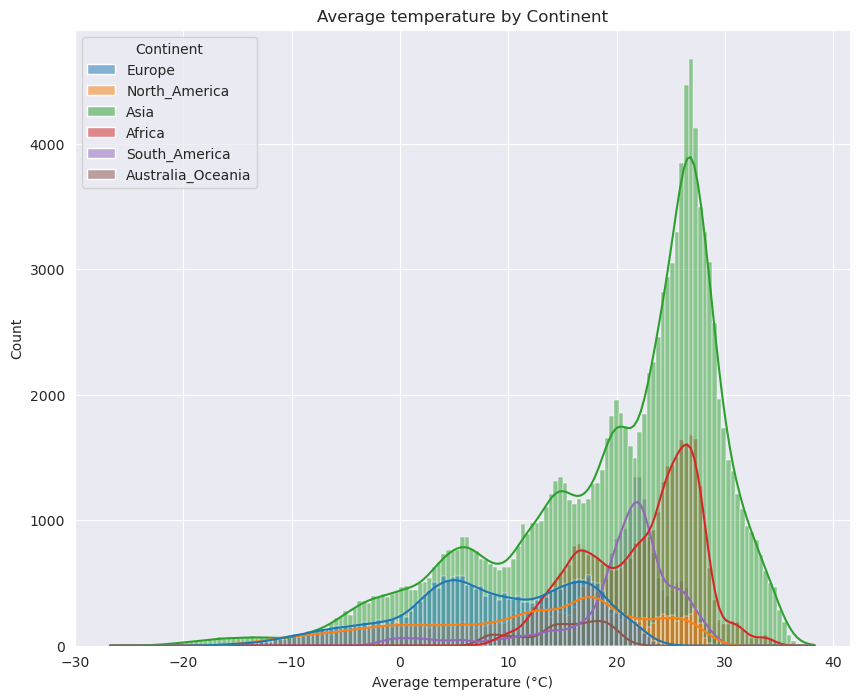

In [543]:
# Plot a histogram for the average temperatures by continent

plt.figure(figsize = (10, 8))
ax = sns.histplot(data = df_clean, x = 'AvgTemperature', hue = 'Continent', kde=True)
ax.set_title('Average temperature by Continent')
ax.set_xlabel('Average temperature (°C)')
plt.show()


In [544]:
continent_temp.head()

Continent
Africa               22.308520
South_America        20.308731
Asia                 19.654393
Australia_Oceania    15.190043
North_America        11.439175
Name: AvgTemperature, dtype: float64

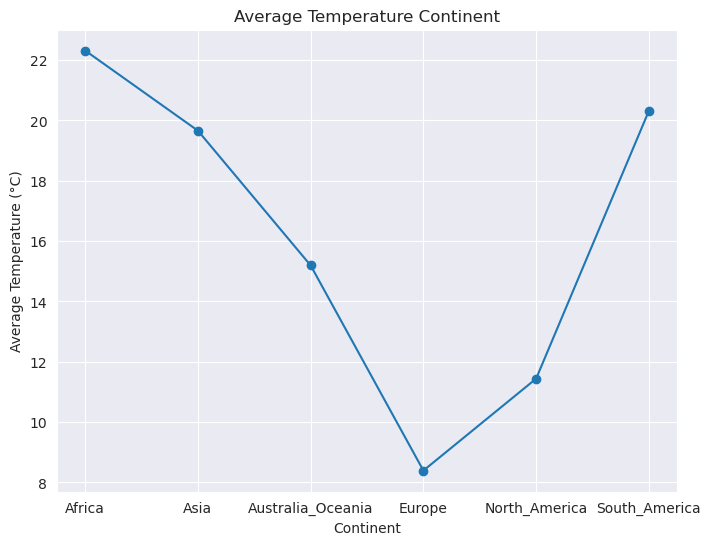

In [545]:
#continent_temp

grouped = continent_temp.groupby('Continent').mean()

# Plot a transesved line plot with each temperature marked with a dot.
grouped.T.plot(kind='line', marker='o', figsize=(8, 6))

plt.title('Average Temperature Continent')
plt.xlabel('Continent')
plt.ylabel('Average Temperature (°C)')

plt.xticks(rotation=0)
plt.grid(True)
plt.show()


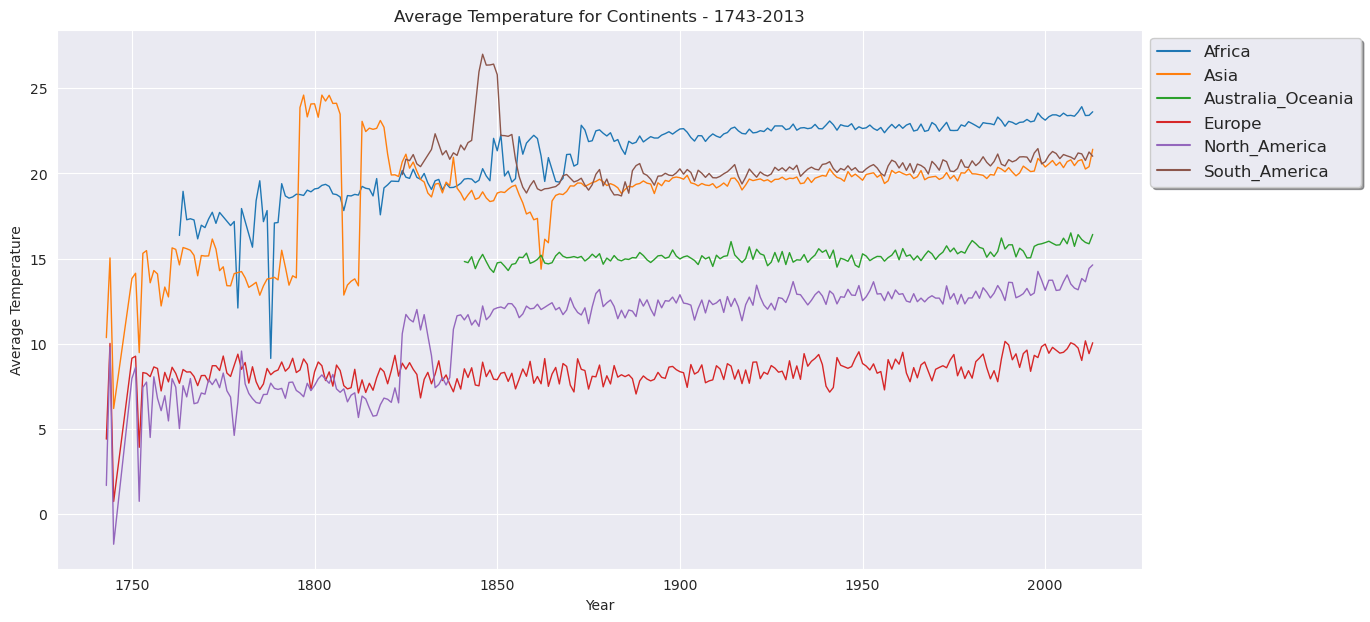

In [546]:
#
df_year = df_clean.copy()

region = df_year[['Continent', 'Year', 'AvgTemperature']].groupby(['Continent', 'Year']).mean().round(2)
plt.figure(figsize=(14,7))
plt.title('Average Temperature for Continents - 1743-2013')
sns.lineplot(x = 'Year', y='AvgTemperature', hue='Continent', units='Continent', markers = True, \
             dashes=False, estimator = None, lw = 1, data = region)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large')
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x800 with 0 Axes>

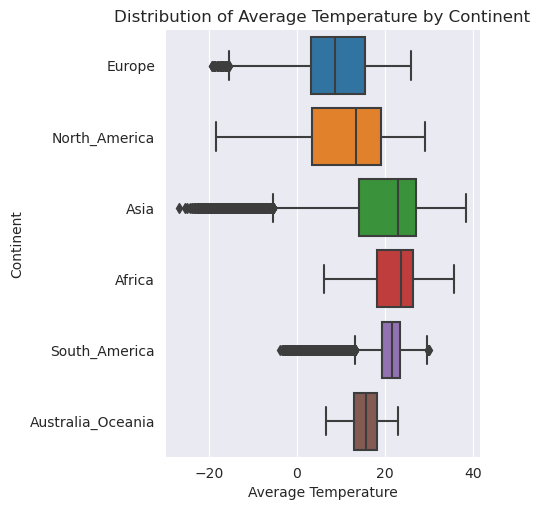

In [547]:
plt.figure(figsize= (10, 8))
sns.catplot(data=df_clean, x='AvgTemperature', y='Continent', kind='box', orient='h')
plt.xlabel('Average Temperature')
plt.ylabel('Continent')
plt.title('Distribution of Average Temperature by Continent')
plt.show()


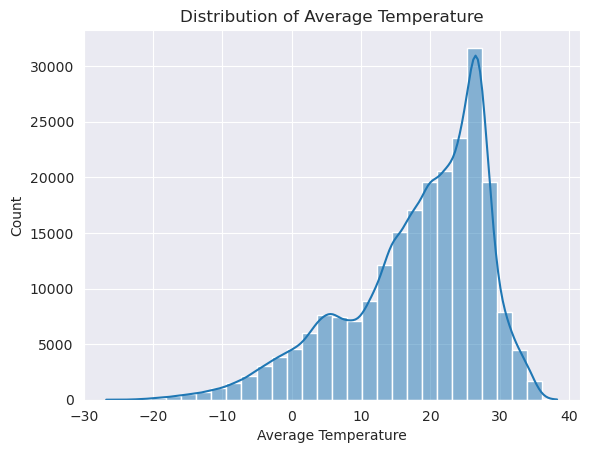

In [548]:
sns.histplot(df_clean['AvgTemperature'],bins=30,kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.show()

## 2. Highest and Lowest Recorded Temperatures in African Cities








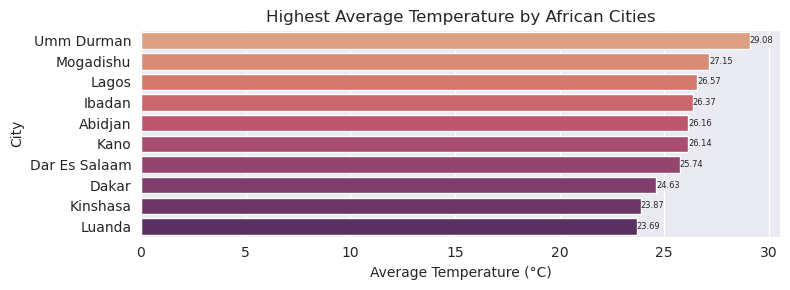

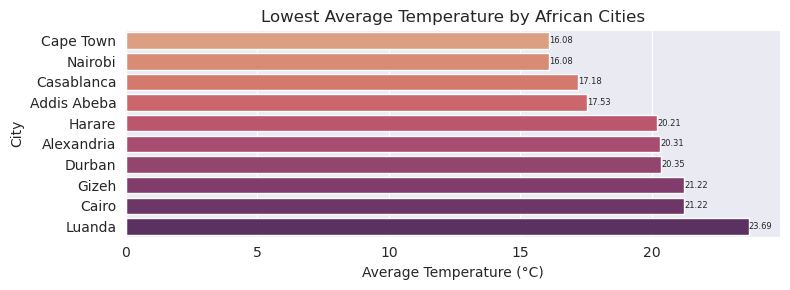

In [550]:

# Highest average temperature
plot_avgtemp(highest_african_avgtemp, 'Highest Average Temperature by African Cities')

# Lowest amount of Rainfall
plot_avgtemp(lowest_african_avgtemp, 'Lowest Average Temperature by African Cities')


## 3. Highest and Lowest Recorded Average Temperatures in Asian Cities

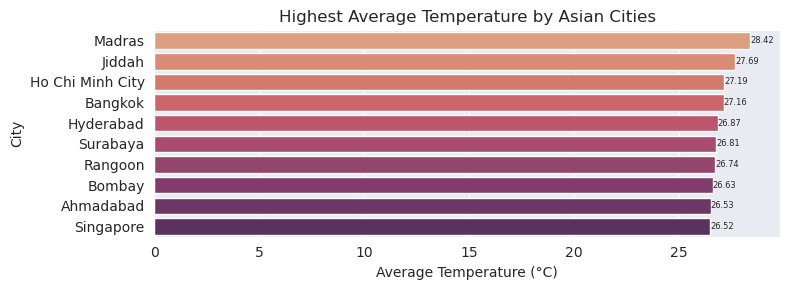

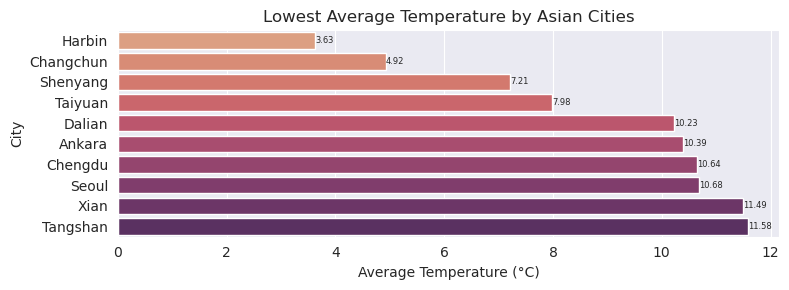

In [552]:
# Highest average temperature
plot_avgtemp(highest_asia_avg_temp, 'Highest Average Temperature by Asian Cities')

# Lowest amount of Rainfall
plot_avgtemp(lowest_asian_avg_temp, 'Lowest Average Temperature by Asian Cities')


## 4. Highest and Lowest Recorded Average Temperatures in European Cities







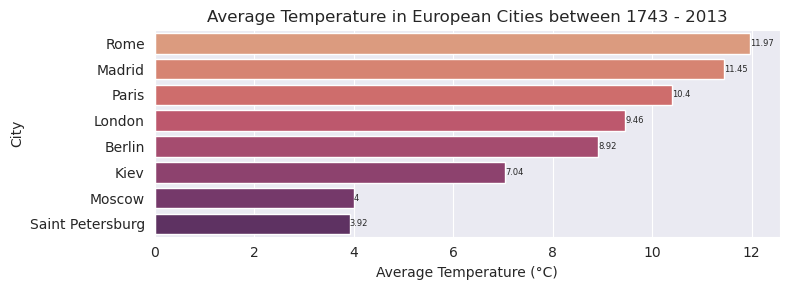

In [554]:
# European average recorded temperature

plot_avgtemp(european_avg, 'Average Temperature in European Cities between 1743 - 2013')


## 5. Highest and Lowest Recorded Average Temperatures in North American Cities






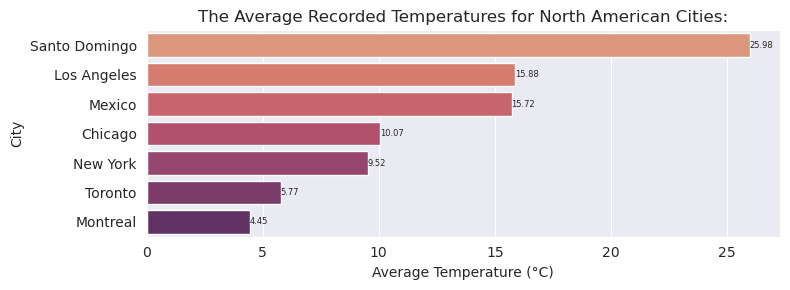

In [556]:
# Highest average temperature
plot_avgtemp(highest_na_avg_temp, 'The Average Recorded Temperatures for North American Cities:')



## 6. Highest and Lowest Recorded Average Temperatures in South American Cities






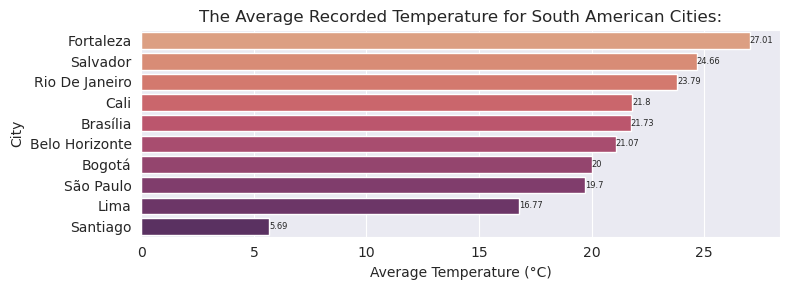

In [558]:
# Highest average temperature
plot_avgtemp(sa_avg_temp, 'The Average Recorded Temperature for South American Cities:')


## 7. Highest and Lowest Recorded Average Temperatures in  Australia and Oceania Cities






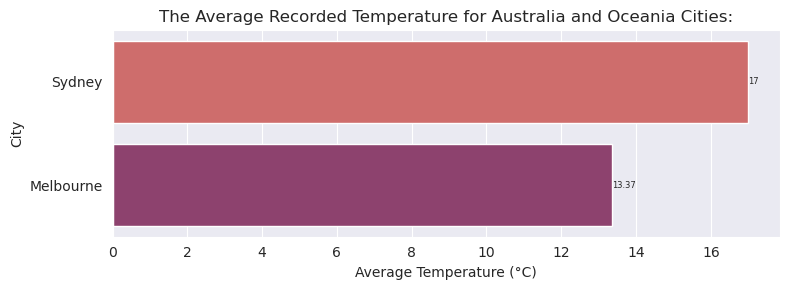

In [560]:
# Highest average temperature
plot_avgtemp(ao_avg_temp , 'The Average Recorded Temperature for Australia and Oceania Cities:')


## 8. European Seasonal Visualisation






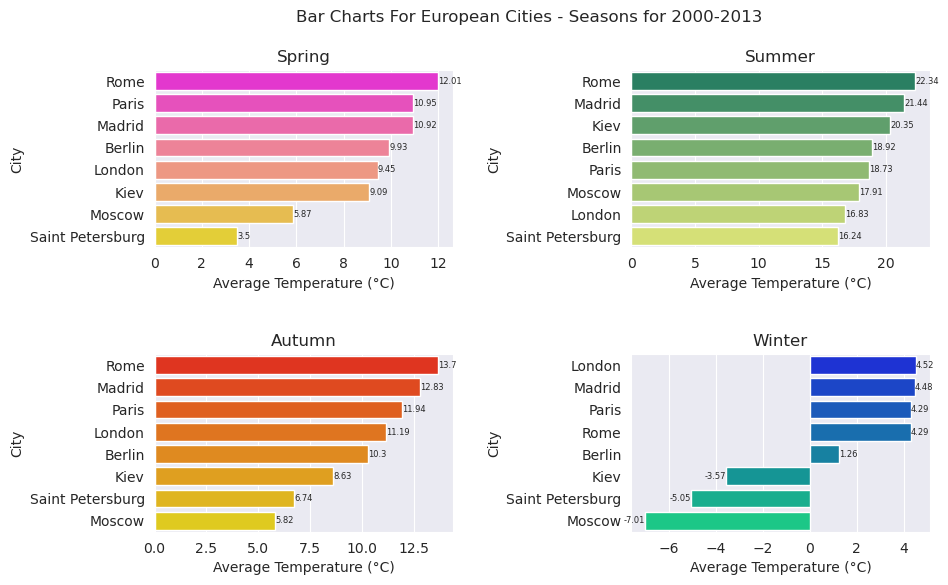

In [562]:
# Create bar charts all together for the seasons in European cities:
fig, axes = plt.subplots(2, 2, figsize=(10,6))

# Create a bar chart for the seasons

sns.barplot(x=spring_dates['AvgTemperature'], y=spring_dates['City'], orient='h', palette='spring',ax=axes[0,0])
sns.barplot(x=summer_dates['AvgTemperature'], y=summer_dates['City'], orient='h', palette='summer',ax=axes[0,1])
sns.barplot(x=autumn_dates['AvgTemperature'], y=autumn_dates['City'], orient='h', palette='autumn', ax=axes[1,0])
sns.barplot(x=winter_dates['AvgTemperature'], y=winter_dates['City'], orient='h', palette='winter', ax=axes[1,1])

# Label the plot and axis for spring

axes[0,0].set_title('Spring')
axes[0,0].set_ylabel('City')
axes[0,0].set_xlabel('Average Temperature (°C)')
axes[0,0].bar_label(axes[0,0].containers[0], fontsize=6)

#Label the plot and axis for summer

axes[0,1].set_title('Summer')
axes[0,1].set_ylabel('City')
axes[0,1].set_xlabel('Average Temperature (°C)')
axes[0,1].bar_label(axes[0,1].containers[0], fontsize=6)

#Label the plot and axis for autumn

axes[1,0].set_title('Autumn')
axes[1,0].set_ylabel('City')
axes[1,0].set_xlabel('Average Temperature (°C)')
axes[1,0].bar_label(axes[1,0].containers[0], fontsize=6)

# Label the plot and axis for winter

axes[1,1].set_title('Winter')
axes[1,1].set_ylabel('City')
axes[1,1].set_xlabel('Average Temperature (°C)')
axes[1,1].bar_label(axes[1,1].containers[0], fontsize=6)

# Adjust the space between the plots to insure they are readable
plt.subplots_adjust(hspace=0.6, wspace=0.6)

# Add a title for the overall bar charts

fig.suptitle('Bar Charts For European Cities - Seasons for 2000-2013')

plt.show()

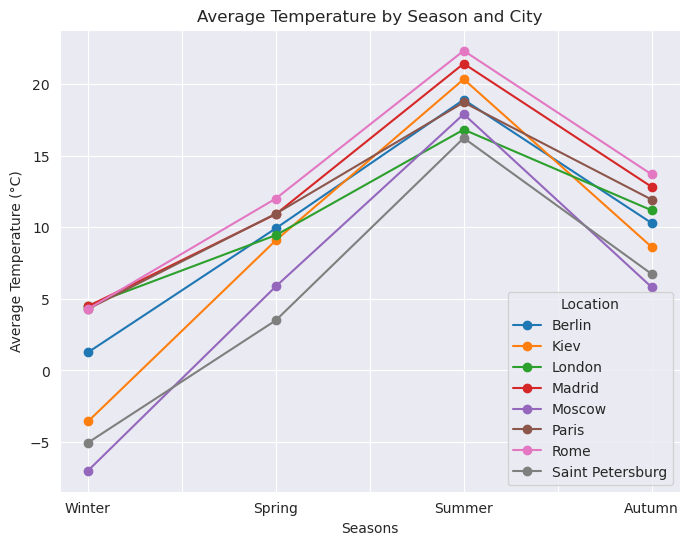

In [563]:
# Display the season changes in a line chart 
#Group the changes by City

grouped = df_seasons.groupby('City').mean()

# Plot a transesved line plot with each temperature marked with a dot.
grouped.T.plot(kind='line', marker='o', figsize=(8, 6))

plt.title('Average Temperature by Season and City')
plt.xlabel('Seasons')
plt.ylabel('Average Temperature (°C)')

plt.xticks(rotation=0)

# Locate the legend in the lower right corner so that plot is readable.

plt.legend(title='Location', loc='lower right')
plt.grid(True)
plt.show()

## 9. Top Ten Hottest  and Coolest Countries






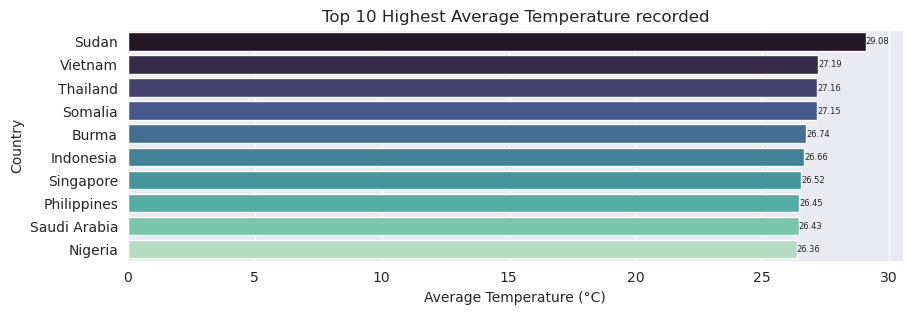

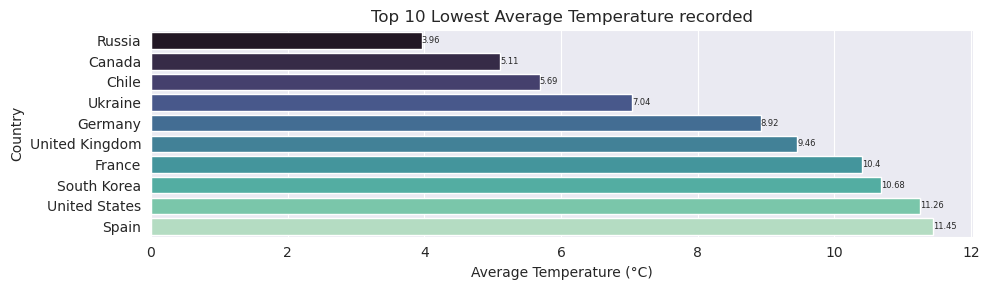

In [565]:
# Produce a bar chart to visually show the highest temperature

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
ax = sns.barplot(x=hi_countries_avg_temp['AvgTemperature'], y=hi_countries_avg_temp['Country'], \
                 orient='h', palette='mako')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.title('Top 10 Highest Average Temperature recorded')


# The lowest recorded temperatures grouped by country

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
ax = sns.barplot(x=lo_countries['AvgTemperature'], y=lo_countries['Country'],\
                 orient='h', palette='mako')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.title('Top 10 Lowest Average Temperature recorded')
plt.tight_layout()
plt.show()



## 10.  Visualisation for Average Temperature Increase between 1743 and 2013

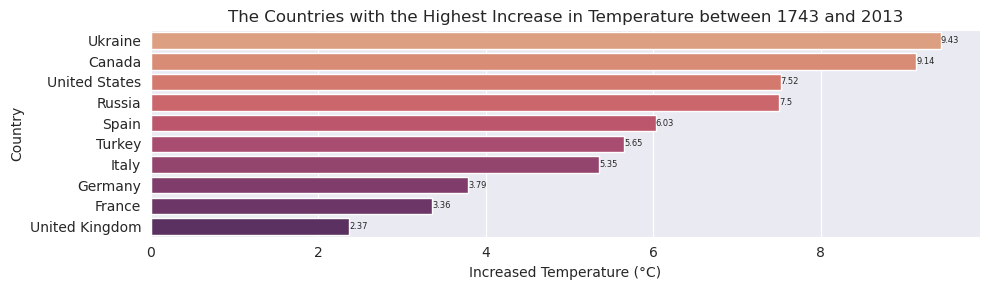

In [567]:
#Plot a bar chart that show the top ten countries with the highest increase in temperature over 
# the time period, 1743 - 2013
increase_countries = merge_df.groupby('Country_2013')['Increased Temp']\
                            .mean().round(2).sort_values(ascending=False).reset_index()

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
high_increase = sns.barplot(x=increase_countries['Increased Temp'], y=increase_countries['Country_2013'], orient='h', palette='flare')
high_increase.bar_label(high_increase.containers[0], fontsize=6)
plt.xlabel('Increased Temperature (°C)')
plt.ylabel('Country')
plt.title('The Countries with the Highest Increase in Temperature between 1743 and 2013')
plt.tight_layout()
plt.show()



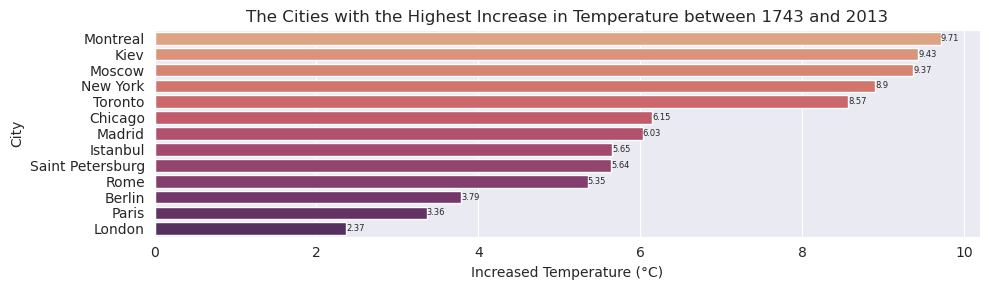

In [568]:
#Plot a bar chart that show the top ten countries with the highest increase in temperature over 
# the time period, 1743 - 2013
increase_cities = merge_df.groupby('City')['Increased Temp']\
                            .mean().round(2).sort_values(ascending=False).reset_index()

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
high_increase = sns.barplot(x=increase_cities['Increased Temp'], y=increase_cities['City'], orient='h', palette='flare')
high_increase.bar_label(high_increase.containers[0], fontsize=6)
plt.xlabel('Increased Temperature (°C)')
plt.ylabel('City')
plt.title('The Cities with the Highest Increase in Temperature between 1743 and 2013')
plt.tight_layout()
plt.show()

## 11. Visualisation for Average Temperature Increase between 2000 and 2013


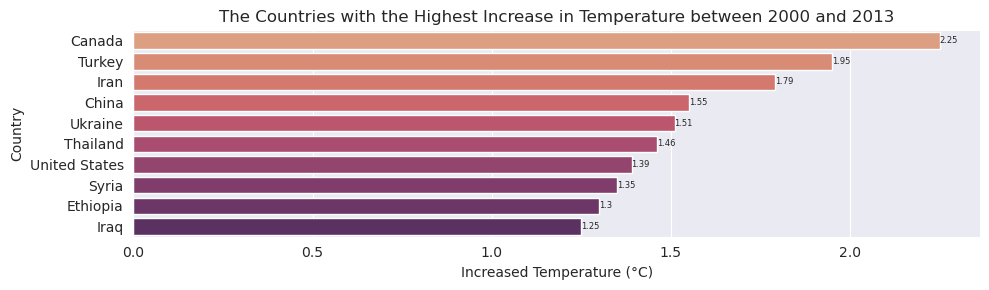

In [570]:
#Plot a bar chart that show the top ten countries with the highest increase in temperature over 
# the time period, 1743 - 2013
increase_high_country = merge_latest_df.groupby('Country_2013')['Increased Temp']\
                            .mean().round(2).sort_values(ascending=False).reset_index().head(10)

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
high_increase = sns.barplot(x=increase_high_country['Increased Temp'], y=increase_high_country['Country_2013'], orient='h', palette='flare')
high_increase.bar_label(high_increase.containers[0], fontsize=6)
plt.xlabel('Increased Temperature (°C)')
plt.ylabel('Country')
plt.title('The Countries with the Highest Increase in Temperature between 2000 and 2013')
plt.tight_layout()
plt.show()

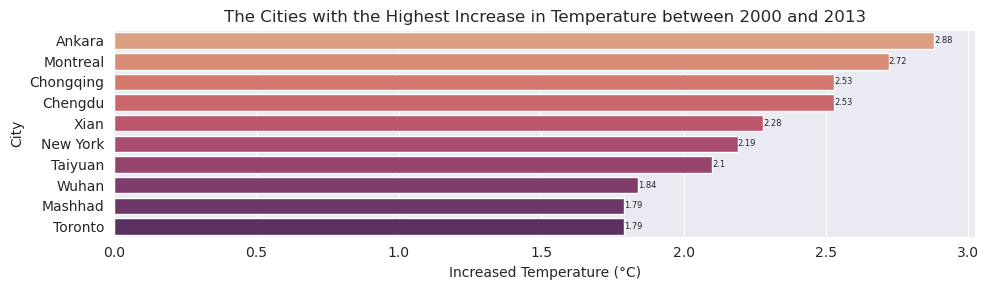

In [571]:
#Plot a bar chart that show the top ten countries with the highest increase in temperature over 
# the time period, 2000 - 2013
increase_high_cities = merge_latest_df.groupby('City')['Increased Temp']\
                            .mean().round(2).sort_values(ascending=False).reset_index().head(10)

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
high_increase = sns.barplot(x=increase_high_cities['Increased Temp'], y=increase_high_cities['City'], orient='h', palette='flare')
high_increase.bar_label(high_increase.containers[0], fontsize=6)
plt.xlabel('Increased Temperature (°C)')
plt.ylabel('City')
plt.title('The Cities with the Highest Increase in Temperature between 2000 and 2013')
plt.tight_layout()
plt.show()

## 12. Visualisation for the lowest increase or Decrease in Average Temperature between 2000 and 2013

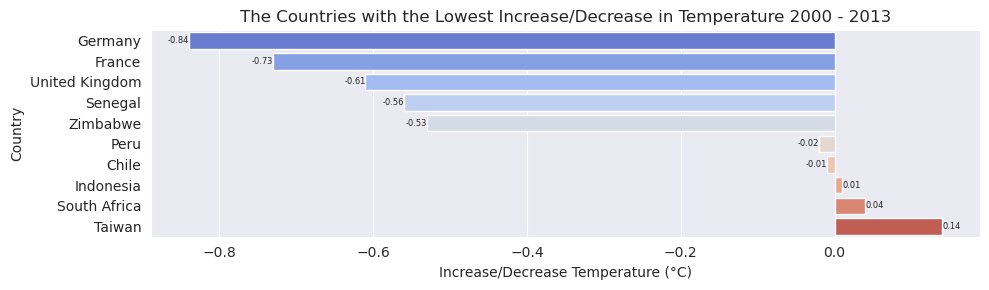

In [573]:
#Plot a bar chart that show the top ten countries with the highest increase in temperature over 
# the time period, 1743 - 2013
increase_low_country = merge_latest_df.groupby('Country_2013')['Increased Temp']\
                            .mean().round(2).sort_values(ascending=True).reset_index().head(10)

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
high_increase = sns.barplot(x=increase_low_country['Increased Temp'], y=increase_low_country['Country_2013'], \
                            orient='h', palette='coolwarm')
high_increase.bar_label(high_increase.containers[0], fontsize=6)
plt.xlabel('Increase/Decrease Temperature (°C)')
plt.ylabel('Country')
plt.title('The Countries with the Lowest Increase/Decrease in Temperature 2000 - 2013')
plt.tight_layout()
plt.show()

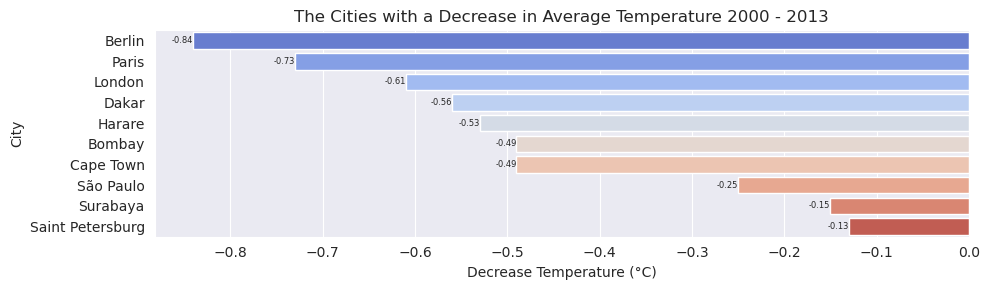

In [574]:
#Plot a bar chart that show the top ten countries with the highest increase in temperature over 
# the time period, 2000 - 2013
increase_low_cities = merge_latest_df.groupby('City')['Increased Temp']\
                            .mean().round(2).sort_values(ascending=True).reset_index().head(10)

sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
high_increase = sns.barplot(x=increase_low_cities['Increased Temp'], y=increase_low_cities['City'], orient='h', palette='coolwarm')
high_increase.bar_label(high_increase.containers[0], fontsize=6)
plt.xlabel('Decrease Temperature (°C)')
plt.ylabel('City')
plt.title('The Cities with a Decrease in Average Temperature 2000 - 2013')
plt.tight_layout()
plt.show()

# Correlation Analysis


In [576]:
# Create a copy of the original dataframe df_clean
df_relation = df_clean.copy()

# Correlation between the average temperature and the longitude/latitude
corr_mat = df_clean[['Latitude', 'Longitude', 'AvgTemperature']].corr()
corr_mat


,Latitude,Longitude,AvgTemperature
Latitude,1.000000,-0.021081,-0.618511
Longitude,-0.021081,1.000000,-0.041783
AvgTemperature,-0.618511,-0.041783,1.000000


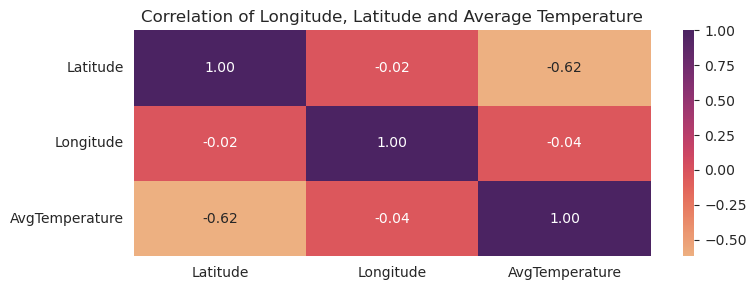

In [577]:
# I will plot a heatmap to visualise the correlation between Long/Lat/Avg Temp
plt.figure(figsize=(8,3))
sns.heatmap(corr_mat, annot=True, cmap='flare', fmt='.2f')
plt.title('Correlation of Longitude, Latitude and Average Temperature')
plt.tight_layout()
plt.show()


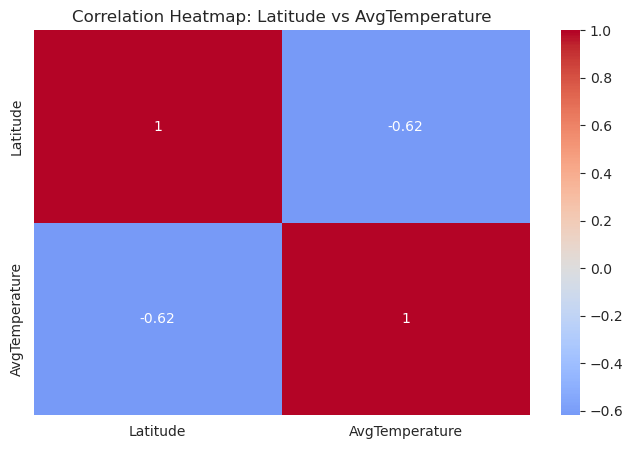

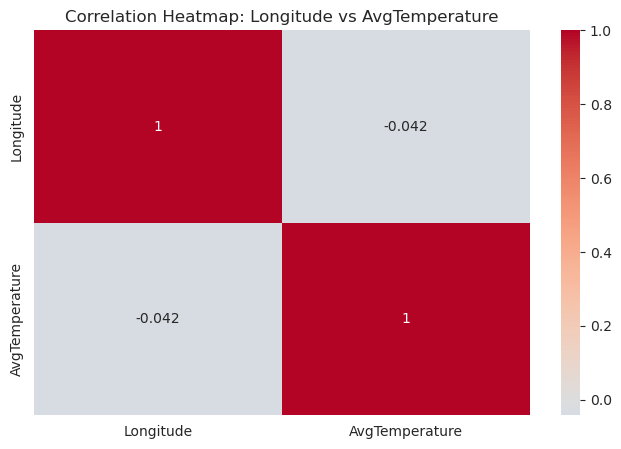

In [578]:
# Heatmaps to visualise the relationship between latitude and longitude and AvgTemperature

# Heatmap of Latitude vs AvgTemperature
plt.figure(figsize=(8, 5))
sns.heatmap(df_relation[['Latitude', 'AvgTemperature']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Latitude vs AvgTemperature')
plt.show()

# Heatmap of Longitude vs AvgTemperature
plt.figure(figsize=(8, 5))
sns.heatmap(df_relation[['Longitude', 'AvgTemperature']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Longitude vs AvgTemperature')
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



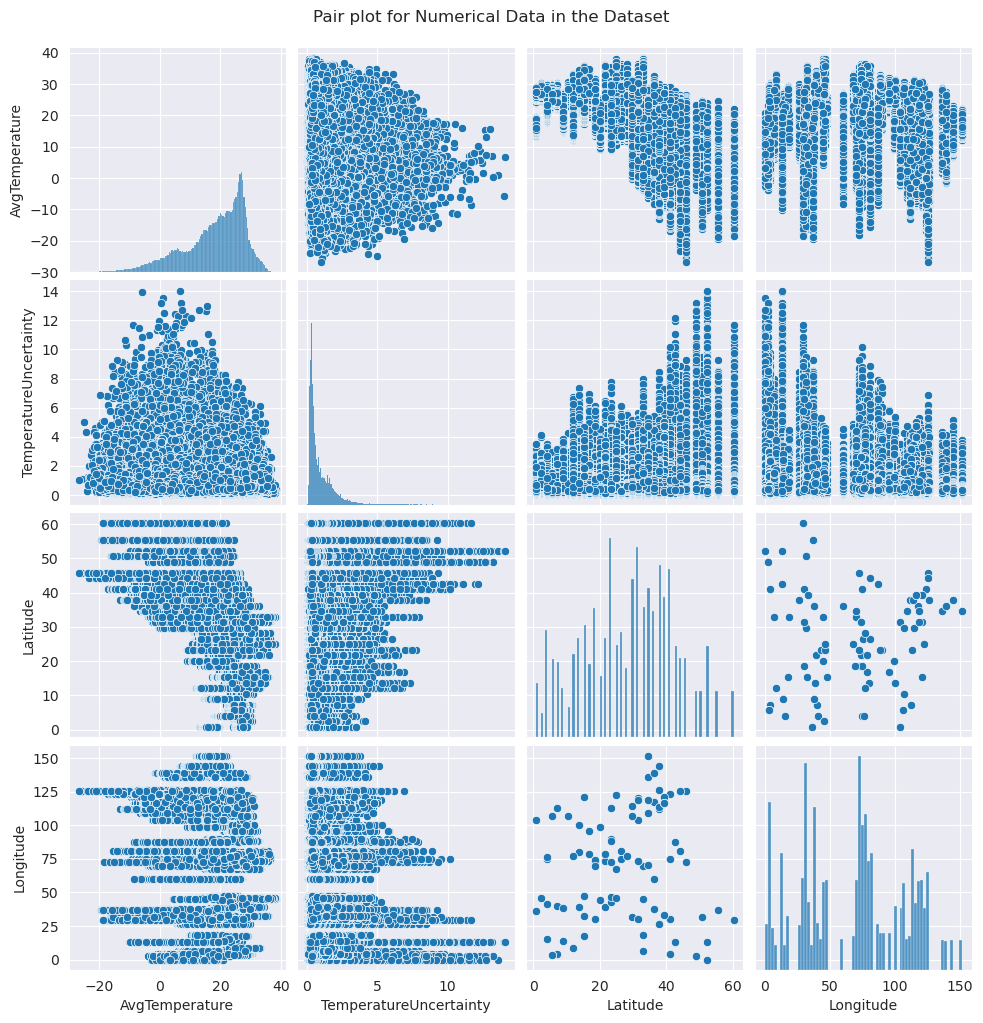

In [579]:
# Summary statistics
summary_stats = df_relation.describe()
summary_stats
# Correlation matrix for all the numerical data in the dataframe
# for this dataframe it would be 'AvgTemperature', 'TemperatureUncertainty', 'Latitude' and 'Longitude'

correlation_matrix = df_relation.corr(numeric_only = True)

# Create a Pairplot for visualisation of relationships

sns.pairplot(df_relation[['AvgTemperature', 'TemperatureUncertainty', 'Latitude', 'Longitude']])
plt.suptitle('Pair plot for Numerical Data in the Dataset', y=1.02)
plt.tight_layout
plt.show()


In [580]:
summary_stats

,Date,AvgTemperature,TemperatureUncertainty,Latitude,Longitude,Year,Month
count,228175,228175.000000,228175.000000,228175.000000,228175.000000,228175.000000,228175.000000
mean,1914-05-08 20:46:44.016215040,18.125996,0.969339,28.568572,68.012638,1913.893209,6.494761
min,1743-11-01 00:00:00,-26.770000,0.040000,0.800000,0.000000,1743.000000,1.000000
25%,1869-12-01 00:00:00,12.710000,0.340000,18.480000,32.500000,1869.000000,3.000000
50%,1918-08-01 00:00:00,20.430000,0.590000,29.740000,73.510000,1918.000000,6.000000
75%,1966-02-01 00:00:00,25.920000,1.320000,39.380000,103.660000,1966.000000,9.000000
max,2013-09-01 00:00:00,38.280000,14.040000,60.270000,151.780000,2013.000000,12.000000
std,NaN,10.024799,0.979652,13.897849,39.668202,62.025981,3.451441


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

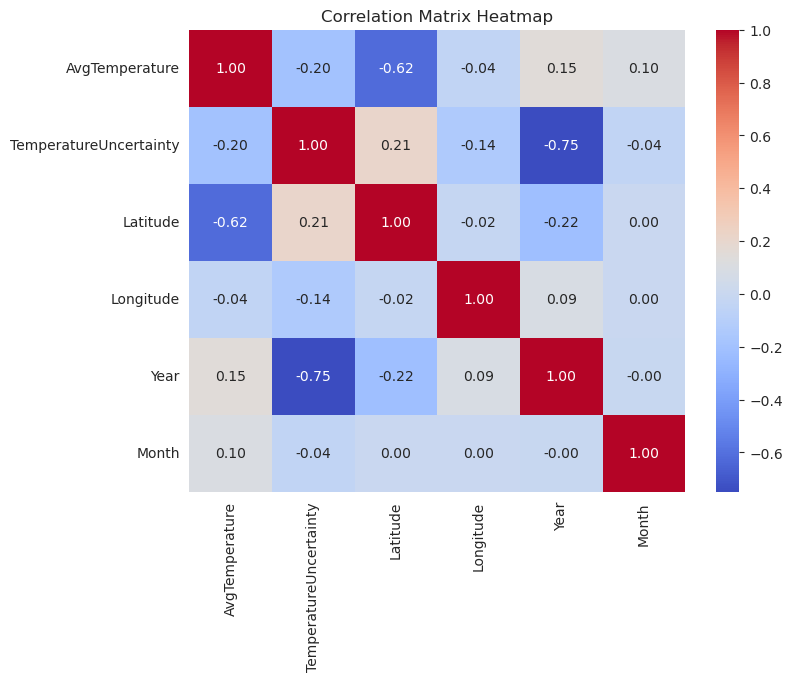

In [581]:
# Create a correlation heat map for all numerical data contained in the dataframe.

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')


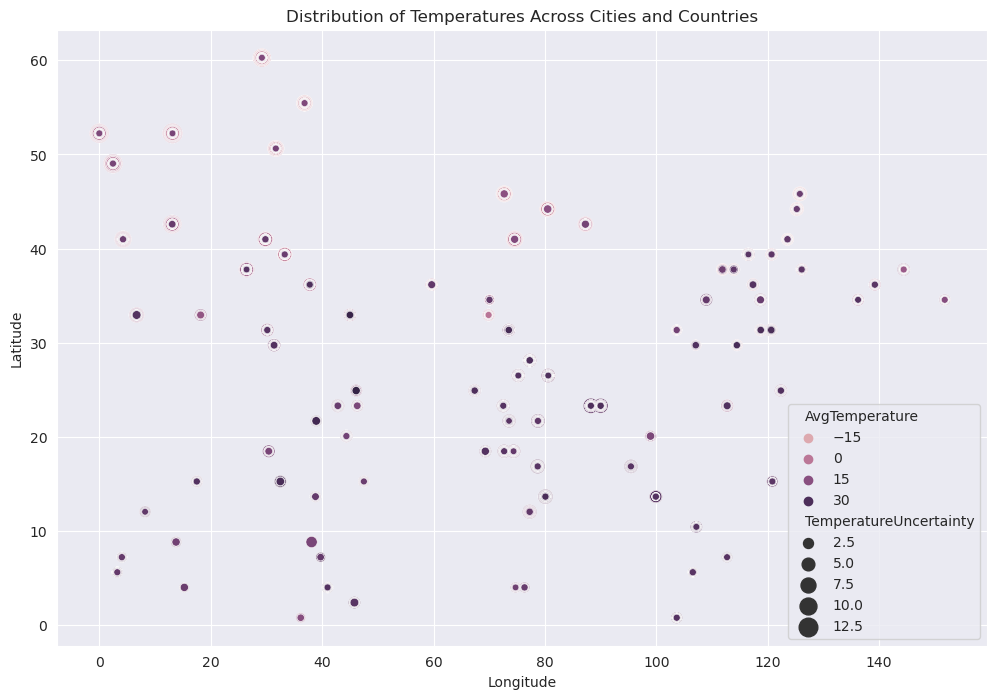

In [582]:
# To explore the distribution of temperatures across cities and countries for any anomalies

# Plot the distribution of temperatures across cities and countries

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='Longitude', y='Latitude', hue='AvgTemperature', size='TemperatureUncertainty', sizes=(20, 200))
plt.title('Distribution of Temperatures Across Cities and Countries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
